# Lista de Exercícios II

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 12/02/2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import time

## Problema 1

Vamos resolver a equação de Poisson para o problema bidimensional abordado no Exemplo 9.1 do livro *Computational Physics* de Mark Newmann (imagem disponível na [lista 2](https://github.com/GabrielWendell/Fisica-Computacional-II/blob/main/Listas/Lista%202.pdf)). No problema em questão, vamos utilizar $\epsilon_{0}=1$ e a nossa iteração será executada até que o valor do potencial elétrico mude em não mais do que $\delta=10^{-6}$ $V$ em qualquer ponto da grade em qualquer etapa.

Primeiramente, vamos definir algumas constantes que serão utilizadas ao longo do problema:

In [2]:
M = 100        # Quadrados de grade em um lado
V = 1.0        # Voltagem.
target = 1e-6  # Precisão alvo.

Agora definimos nossos arrays:

In [3]:
phi = np.zeros([M+1,M+1],float)

phi[60:80,20:40] = V
phi[20:40,60:80] = -V

store = np.empty([M+1,M+1],float)

Agora vamos ao loop principal:

In [4]:
delta = 10.0
timestart = time.time()

while delta > target:
    # Calcula os novos valores do potencial
    delta = 0
    for i in range(1,M-1):
        for j in range(1,M-1):
            if i==0 or i==M or j==0 or j==M:
                store[i,j] = 0 
            else:
                store[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                difference = abs(store[i,j] - phi[i,j])
                
                if difference > delta:
                    delta = difference

    phi = np.copy(store)
                    
timeend = time.time()
totaltime = timeend - timestart

Por fim, vamos ao plot:

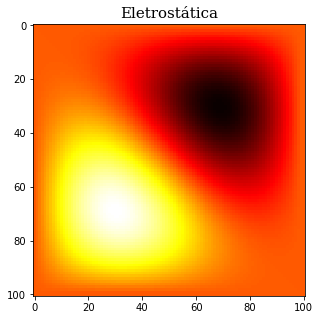

In [5]:
plt.figure(figsize=(8,5))

plt.title('Eletrostática', family='serif', fontsize=15)
plt.imshow(phi)
plt.hot()
# plt.gray()

Vamos ver o tempo que foi gasto no nosso programa:

In [6]:
print('Tempo gasto:', totaltime, 'segundos')

Tempo gasto: 172.83701634407043 segundos


$\text{ }$

## Problema 2

Vamos usar o método de superrelaxação / Gauss-Seidal para resolver a equação de Laplace para o problema bidimensional abordada no Exemplo 9.1 do livro *Computational Physics* de Mark Newmann - uma caixa quadrada de 1 m de cada lado, com tensão $V=1$ volt ao longo da parede superior e zero voltao longo dos outros três. Usamos uma grade de espaçamento $a=$ 1cm, de modo que haja 100 pontos de grade ao longo de cada parede, ou 101 se você contar os pontos em ambas as extremidades.

Continuamos a iteração do método até que o valor do potencial elétrico mude em não mais do que $\delta=10^{-6}$ $V$ em qualquer ponto da grade em qualquer etapa, então fazemos um gráfico de densidade da solução final, semelhante à mostrada em 9.3.

Vamos experimentar diferentes valores de $\omega$ para descobrir qual valor fornece a solução mais rápida. Começamos definindo as constantes que iremos utilizar:

In [7]:
M = 100        # Quadrados de grade em um lado
V = 1.0        # Tensão na parede superior
target = 1e-6  # Precisão alvo
w = 0.9        # Omega

Agora criamos matrizes para armazenar os valores dos potenciais:

In [8]:
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V

Agora vamos ao loop principal:

In [9]:
delta = 1.0
timestart = time.time()

while delta > target:
    # Calcula novos valores do potencial:
    delta = 0.0
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                continue
            else:
                temp = phi[i,j]
                phi[i,j] = (1 + w)*(phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 \
                                - w*phi[i,j]
                difference = abs(temp - phi[i,j])
                if difference > delta:
                    delta = difference
                    
timeend = time.time()
totaltime = timeend - timestart

Por fim, vamos gerar o nosso plot:

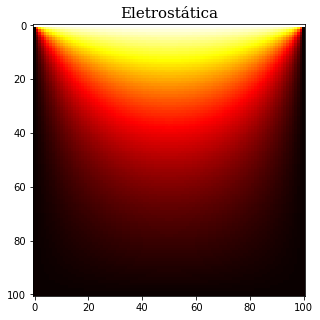

In [10]:
plt.figure(figsize=(8,5))

plt.title('Eletrostática', family='serif', fontsize=15)
plt.imshow(phi)
plt.hot()
# plt.gray()

Vamos ver o tempo que foi gasto em nosso programa:

In [11]:
print('Tempo gasto:', totaltime, 'segundos')

Tempo gasto: 19.566171646118164 segundos


$\text{ }$

## Problema 3

Consideremos o modelo simples de um capacitor eletrônico, consistindo de duas placas de metal planas envolvidas em uma caixa de metal quadrada (imagem disponível na [lista 2](https://github.com/GabrielWendell/Fisica-Computacional-II/blob/main/Listas/Lista%202.pdf)).

Para simplificar, modelamos o sistema em duas dimensões. Usamos o método de Jacobi para escrever o programa para calcular o potencial eletrostático na caixa em uma grade de $100\times100$ pontos, onde as paredes da caixa estão com tensão zero e as duas placas (que são de espessura desprezível) são nas tensões $\pm 1$ $V$ conforme mostrado.

Calculamos o valor do potencial em cada ponto da grade com uma precisão de $10^{-6}$ volts e, em seguida, fazemos um gráfico de densidade do resultado. Analogamente ao que foi feito no problema anterior, começamos definindo as nossas constantes:

In [12]:
M = 100        # Quadrados de grade em um lado
V = 1.0        # Tensão na parede superior
target = 1e-6  # Precisão alvo
w = 0.9        # Omega

Agora criamos arrays para armazenar os valores do potencial:

In [13]:
phi = np.zeros([M+1,M+1],float)
phi[0,:] = 0         # Parede de cima.
phi[:,0] = 0         # Parede da esquerda 
phi[M,:] = 0         # Parede de baixo. 
phi[:,M] = 0         # Parede da direita. 
phi[20:81,20] = 1    # Placa positiva esquerda.
phi[20:81,80] = -1   # Placa negativa direita. 

# phiprime = np.empty([M+1,M+1],float)

Agora vamos ao loop principal:

In [14]:
delta = 1.0
timestart = time.time()

while delta > target:
    
    # Calcula novos valores do potencial:
    delta = 0.0 
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M or (20<=i<=80 and j == 20)\
            or (20<=i<=80 and j == 80):
                continue 
            else:
                temp = phi[i,j]
                phi[i,j] = (1 + w)*(phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 \
                                - w*phi[i,j]
                difference = abs(temp - phi[i,j])
                if difference > delta: 
                    delta = difference 
                
timeend = time.time()
totaltime = timeend - timestart 

Por fim, vamos ao plot:

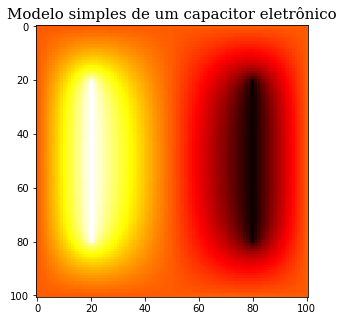

In [15]:
plt.figure(figsize=(8,5))

plt.title('Modelo simples de um capacitor eletrônico',family='serif',fontsize=15)
plt.imshow(phi)
plt.hot()
# plt.gray()

Para complementar, vamos ver o tempo gasto pelo programa:

In [16]:
print('Tempo gasto:', totaltime, "segundos")

Tempo gasto: 12.344534158706665 segundos


$\text{ }$

## Problema 4

Um exemplo clássico do problema de difusão com uma condição de contorno variável no tempo é a difusão de calor na crosta terrestre, pois a temperatura da superfície varia com as estações. Suponha que a temperatura média diária em um determinado ponto da superfície varie como:

$$T_{0}(t)=A+B\sin{\frac{2\pi t}{\tau}},$$

onde $\tau=365$ dias, $A=10^{\circ}C$, e $B=12^{\circ}C$.

A uma profundidade de 20m abaixo da superfície, quase toda a variação anual de temperatura é eliminada e a temperatura é, em uma boa aproximação, uma constante de $11^{\circ}C$ (que é maior que a temperatura média da superfície de $10^{\circ}C$ - a temperatura aumenta com a profundidade, devido ao aquecimento do núcleo quente do planeta). A difusividade térmica da crosta terrestre varia um pouco de um lugar para outro, mas para nossos propósitos, vamos tratá-la como constante com valor de $D=0.1$ $m^{2}\cdot\text{dia}^{-1}$.

Vamos escrever um programa para calcular o perfil de temperatura da crosta em função da profundidade de até 20m e do tempo de até 10 anos. Começamos com uma temperatura em todos os lugares igual a $10^{\circ}C$, exceto na superfície e no ponto mais profundo, escolhemos valores para o número de pontos de grade e o intervalo de tempo $h$, em seguida, executamos nosso programa para os primeiros nove anos simulados, para permitir que ele se estabeleça em qualquer padrão que alcance. Em seguida, para o décimo e último ano, traçaremos quatro perfis de temperatura tomados em intervalos de 3 meses em um único gráfico para ilustrar como a temperatura muda em função da profundidade e do tempo.

Começamos definindo as constantes que usaremos ao longo do problema:

In [17]:
L = 20.0      # Espessura da superfície da Terra (em metros).
D = 0.1       # Difusividade térmica em m^{2}*dia^{-1}.
N = 100       # Número de divisões na grade.
a = L/N       # Espaçamento da grade.
h = 1e-2      # Intervalo de tempo.
tau = 365     # Um ano (em dias).
A = 10        # Temperatura (em Celsius).
B = 12        # Temperatura (em Celsius).

epsilon = h/1000

Definimos a nossa função principal:

In [18]:
def surfaceT(t):
    return A + B*np.sin(2*np.pi*t/tau)

Definimos mais algumas constantes:

In [19]:
Tsurf = 10.0    # Temperatura baixa (em Celsius).
Tearth = 10.0   # Temperatura intermediária (em Celsius).
Tbottom = 11.0  # Temperatura alta (em Celsius).

Definimos agora as relações temporais:

In [20]:
t9 = 9*tau
t91 = 9.25*tau
t92 = 9.5*tau 
t93 = 9.75*tau
t10 = 10*tau
tend = t10 + epsilon

Criamos nossos arrays:

In [21]:
T = np.empty(N+1,float)
T[0] = Tbottom
T[N] = A
T[1:N] = Tearth
Tp = np.empty(N+1,float)
Tp[0] = Tbottom
Tp[N] = A 

Como de costume, criamos uma função para melhorar um pouco a estética dos plots:

In [22]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Agora estabelecemos o nosso loop principal:

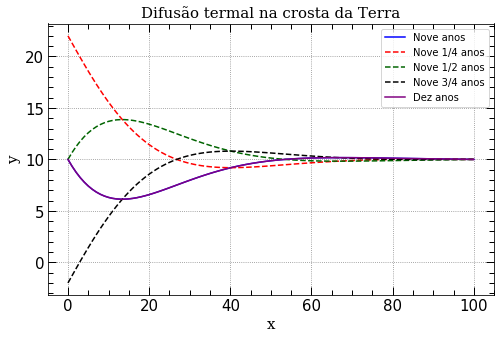

In [23]:
t = 0.0
c = h*D/(a*a)

plt.figure(figsize=(8,5))
while t < tend:

    # Calcula os novos valores de T:
    T[0] = surfaceT(t)
    '''
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    '''
    Tp[1:N] = T[1:N] + c*(T[0:N-1] + T[2:N+1] -2*T[1:N])
    T,Tp = Tp,T
    t += h

    # Realiza as plotagens nos momentos dados:
    if abs(t-t9) < epsilon:
        plt.plot(T, color='blue', label = "Nove anos")
        opt_plot()
    if abs(t-t91) < epsilon:
        plt.plot(T, '--', color='red', label = "Nove 1/4 anos")
    if abs(t-t92) < epsilon:
        plt.plot(T, '--', color='darkgreen', label = "Nove 1/2 anos")
    if abs(t-t93) < epsilon:
        plt.plot(T, '--', color='black', label = "Nove 3/4 anos")
    if abs(t-t10) < epsilon:
        plt.plot(T, color='purple', label = "Dez anos")
        
plt.title('Difusão termal na crosta da Terra',family='serif',fontsize=15)
plt.xlabel('x',family='serif',fontsize=15)
plt.ylabel('y',family='serif',fontsize=15)
plt.legend(loc='best')    

$\text{ }$